##Extracción, verificación de datos e imoportación de bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [ ]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##Deshaciendonos de columnas innecesarias

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
#Verificando valores Nulos
print('\nValores nulos por columna:\n')
print(df.isnull().sum())


Valores nulos por columna:

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [ ]:
#Normalizando columnas y eliminando añadidas originarias del Dataframe
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

df= pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
#Revisando las columnas importantes
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
#Renombrando las columnas para mejor seguimiento
df.rename(columns={
    'customerID': 'id',
    'Churn':'cancelado',
    'gender': 'genero',
    'SeniorCitizen': 'mayor65',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'mesesContrato',
    'PhoneService': 'servicioTelefonico',
    'MultipleLines': 'lineasMultiples',
    'InternetService': 'servicioInternet',
    'OnlineSecurity': 'seguridadLinea',
    'OnlineBackup': 'SoporteLinea',
    'DeviceProtection': 'proteccionDispositivos',
    'TechSupport': 'soporteTecnico',
    'StreamingTV': 'servicioTv',
    'StreamingMovies': 'servicioPeliculas',
    'PaperlessBilling': 'facturasElectronicas',
    'PaymentMethod': 'metodoPago',
    'Contract': 'tipoContrato',
    'Charges.Monthly': 'gastosMensuales',
    'Charges.Total': 'gastosTotales'
}, inplace=True)

In [ ]:
df.head()

,id,cancelado,genero,mayor65,pareja,dependientes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,SoporteLinea,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7267 non-null   object 
 1   cancelado               7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   mayor65                 7267 non-null   int64  
 4   pareja                  7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   mesesContrato           7267 non-null   int64  
 7   servicioTelefonico      7267 non-null   object 
 8   lineasMultiples         7267 non-null   object 
 9   servicioInternet        7267 non-null   object 
 10  seguridadLinea          7267 non-null   object 
 11  SoporteLinea            7267 non-null   object 
 12  proteccionDispositivos  7267 non-null   object 
 13  soporteTecnico          7267 non-null   object 
 14  servicioTv              7267 non-null   

In [ ]:
#Verificando valores nulos
print('\nValores nulos por columna:\n')
df.isnull().sum()


Valores nulos por columna:



,0
id,0
cancelado,0
genero,0
mayor65,0
pareja,0
dependientes,0
mesesContrato,0
servicioTelefonico,0
lineasMultiples,0
servicioInternet,0


In [ ]:
#Chequeo de strings vacios
(df['cancelado'] == '').sum()

np.int64(224)

In [ ]:
(df['gastosTotales'] == ' ').sum()

np.int64(11)

##Verificación de Inconsistencias

In [ ]:
df['cancelado'] = df['cancelado'].replace('', np.nan)
df['gastosTotales'] = df['gastosTotales'].replace(' ', np.nan)

In [ ]:
int((df['cancelado'] == '').sum())

0

In [ ]:
df.isnull().sum()

,0
id,0
cancelado,224
genero,0
mayor65,0
pareja,0
dependientes,0
mesesContrato,0
servicioTelefonico,0
lineasMultiples,0
servicioInternet,0


In [ ]:
df = df.dropna(subset=['cancelado', 'gastosTotales'])
df[['cancelado', 'gastosTotales']].isnull().sum()

,0
cancelado,0
gastosTotales,0


In [ ]:
#Verificando valores duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
#Conversión de datos
df.loc[:,'gastosTotales'] = df['gastosTotales'].astype(float)

variables_str = ['id', 'genero', 'servicioInternet', 'tipoContrato', 'metodoPago']
df.loc[:, variables_str] = df[variables_str].astype(str)

variables_bool = ['cancelado', 'mayor65', 'pareja', 'dependientes', 'facturasElectronicas']
df.loc[:, variables_bool] = df[variables_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

variables_cat = ['lineasMultiples', 'seguridadLinea', 'SoporteLinea', 'proteccionDispositivos', 'soporteTecnico', 'servicioTv', 'servicioPeliculas']
df.loc[:, variables_cat] = df[variables_cat].astype ('category')

/tmp/ipython-input-3902902106.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, variables_bool] = df[variables_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)


In [ ]:
df.head()

,id,cancelado,genero,mayor65,pareja,dependientes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,SoporteLinea,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.3
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.4
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.4


In [ ]:
df.duplicated().sum()

np.int64(0)

##Cuentas diarias

In [ ]:
df['gastosDiarios'] = df['gastosMensuales'].astype(float) / 30

In [ ]:
df.head()

,id,cancelado,genero,mayor65,pareja,dependientes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales,gastosDiarios
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.4,2.796667


In [ ]:
print('____________________________\nEstadísticas descriptivas\nde Cuentas Diarias\n____________________________')
print(df['gastosDiarios'].describe().round(2))

____________________________
Estadísticas descriptivas
de Cuentas Diarias
____________________________
count    7032.00
mean        2.16
std         1.00
min         0.61
25%         1.19
50%         2.34
75%         3.00
max         3.96
Name: gastosDiarios, dtype: float64


In [ ]:
df[variables_bool] = df[variables_bool].astype(int)
df[variables_bool].head()

,cancelado,mayor65,pareja,dependientes,facturasElectronicas
0,0,0,1,1,1
1,0,0,0,0,0
2,1,0,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   cancelado               7032 non-null   int64  
 2   genero                  7032 non-null   object 
 3   mayor65                 7032 non-null   int64  
 4   pareja                  7032 non-null   int64  
 5   dependientes            7032 non-null   int64  
 6   mesesContrato           7032 non-null   int64  
 7   servicioTelefonico      7032 non-null   object 
 8   lineasMultiples         7032 non-null   object 
 9   servicioInternet        7032 non-null   object 
 10  seguridadLinea          7032 non-null   object 
 11  SoporteLinea            7032 non-null   object 
 12  proteccionDispositivos  7032 non-null   object 
 13  soporteTecnico          7032 non-null   object 
 14  servicioTv              7032 non-null   objec

##Balance de clases

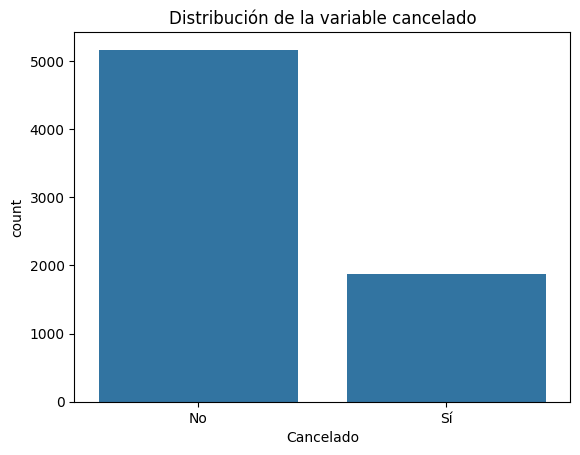

In [ ]:
df['cancelado_label'] = df['cancelado'].map({0: 'No', 1: 'Sí'})

sns.countplot(x='cancelado_label', data=df)
plt.title("Distribución de la variable cancelado")
plt.xlabel("Cancelado")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
X = df.drop(columns=['cancelado'])
y = df['cancelado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def convert_bools(df):
    df = df.copy()
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(int)
    return df

X_train = convert_bools(X_train)
X_test = convert_bools(X_test)

num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print("Columnas numéricas:", num_cols.tolist())
print("Columnas categóricas:", cat_cols.tolist())

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

clf = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

clf.fit(X_train, y_train)

print("Pipeline entrenado con SMOTE y sin errores de NaN o bools")

Columnas numéricas: ['mayor65', 'pareja', 'dependientes', 'mesesContrato', 'facturasElectronicas', 'gastosMensuales', 'gastosDiarios']
Columnas categóricas: ['id', 'genero', 'servicioTelefonico', 'lineasMultiples', 'servicioInternet', 'seguridadLinea', 'SoporteLinea', 'proteccionDispositivos', 'soporteTecnico', 'servicioTv', 'servicioPeliculas', 'tipoContrato', 'metodoPago', 'gastosTotales']
Pipeline entrenado con SMOTE y sin errores de NaN o bools


##Correlación y selección de variables

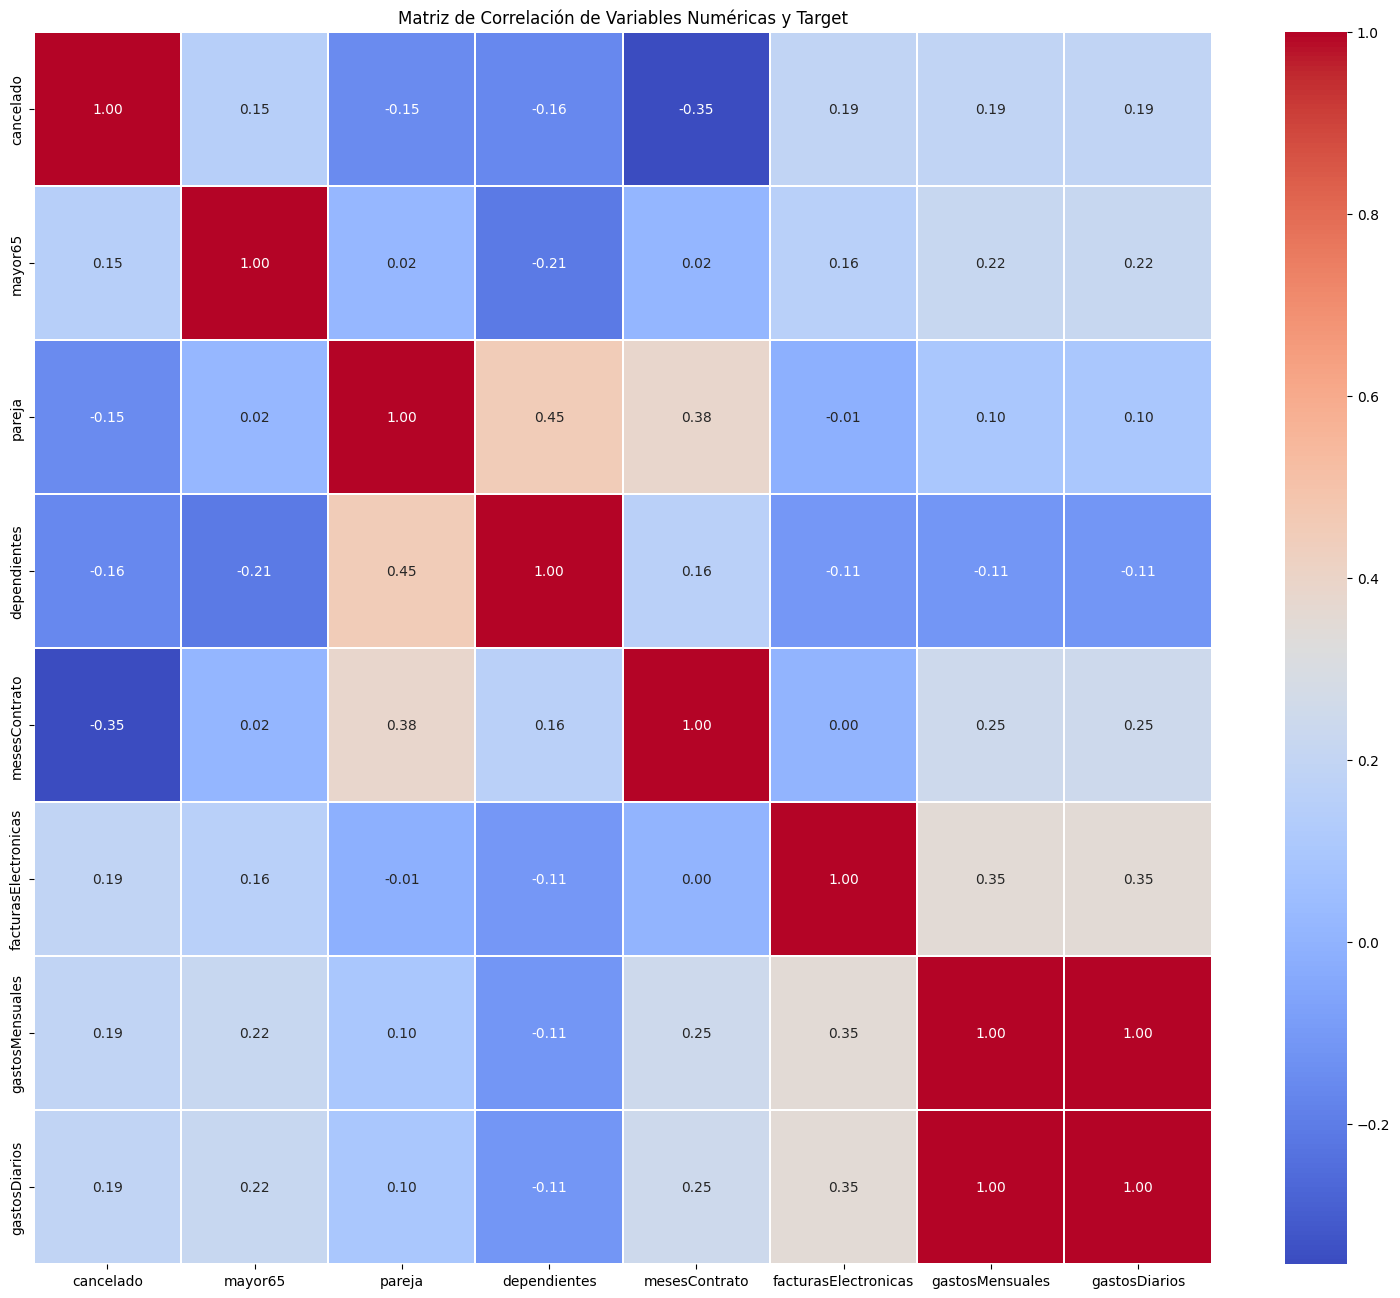


Correlación con la variable 'cancelado':
cancelado               1.000000
gastosDiarios           0.192858
gastosMensuales         0.192858
facturasElectronicas    0.191454
mayor65                 0.150541
pareja                 -0.149982
dependientes           -0.163128
mesesContrato          -0.354049
Name: cancelado, dtype: float64


In [ ]:
#Análisis de correlación

# Excluir la columna 'id' antes de calcular la correlación
correlation_matrix = df.drop(columns=['id']).corr(numeric_only=True)

#Mapa de calor para identificar las correlaciones de variables númericas.

plt.figure(figsize=(19, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.3)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

print("\nCorrelación con la variable 'cancelado':")
print(correlation_matrix['cancelado'].sort_values(ascending=False))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy Score:
0.7810945273631841

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.60      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407


Confusion Matrix:
[[896 137]
 [171 203]]


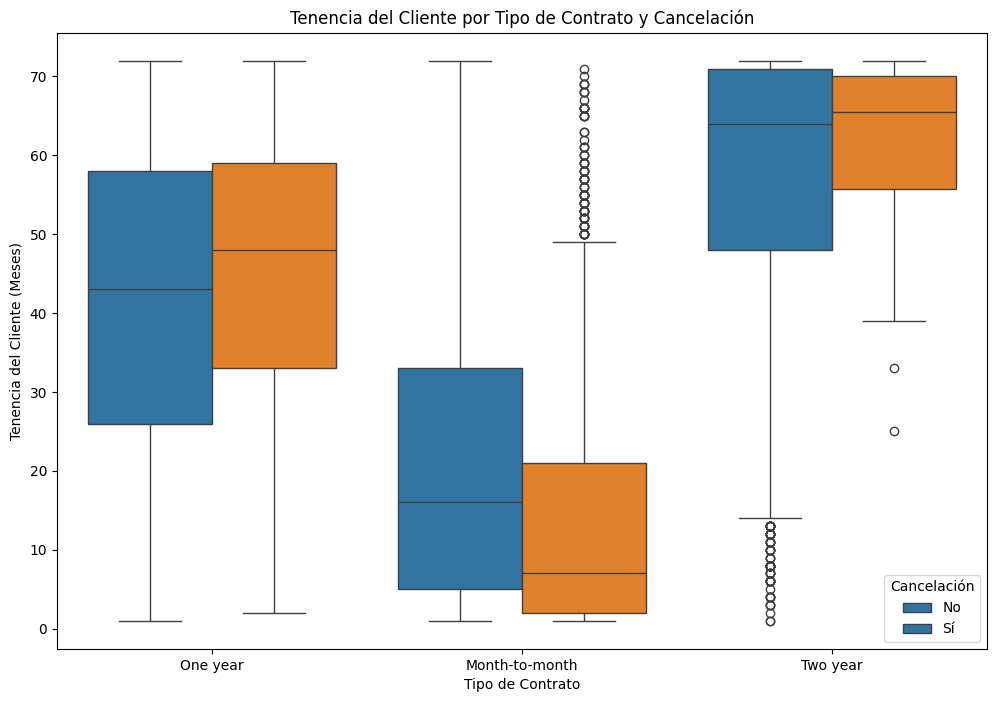

/tmp/ipython-input-2620183331.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='tipoContrato', y='cancelado', data=df, ci=None)


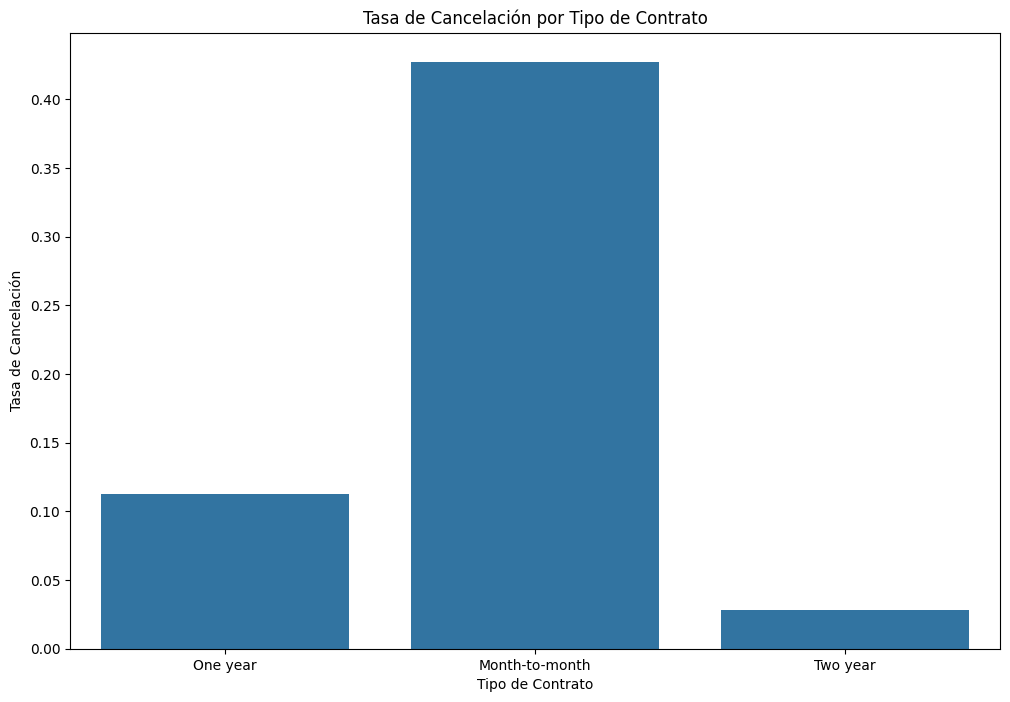

In [178]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipoContrato', y='mesesContrato', hue='cancelado_label', data=df)
plt.title('Tenencia del Cliente por Tipo de Contrato y Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='tipoContrato', y='cancelado', data=df, ci=None)
plt.title('Tasa de Cancelación por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Cancelación')

plt.show()

##Modelo predictivo

In [181]:
#Separación de datos

X = df.drop('cancelado', axis=1) # Características
y = df['cancelado'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

print("\nDistribución de 'cancelado' en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de 'cancelado' en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Dimensiones de X_train: (5625, 22)
Dimensiones de X_test: (1407, 22)
Dimensiones de y_train: (5625,)
Dimensiones de y_test: (1407,)

Distribución de 'cancelado' en el conjunto de entrenamiento:
cancelado
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Distribución de 'cancelado' en el conjunto de prueba:
cancelado
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [196]:
# Separar variables predictoras (X) y target (y)
# Excluir las columnas 'cancelado', 'id', and 'cancelado_label' de las características
X = df.drop(columns=['cancelado', 'id', 'cancelado_label'])
y = df['cancelado']

# Detectar tipos de columnas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("\nColumnas categóricas detectadas:")
print(cat_cols)
print("\nColumnas numéricas detectadas:")
print(num_cols)


X_encoded = pd.get_dummies(X, drop_first=True)

print("\nShape después del One-Hot Encoding:", X_encoded.shape)
print("\nEjemplo de columnas resultantes:")
print(X_encoded.columns[:30])  # muestra solo las primeras 30

# 4. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


# 5. Modelo de Regresión Logística
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)

# 6. Evaluación del modelo
y_pred = log_reg_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))



Columnas categóricas detectadas:
['genero', 'servicioTelefonico', 'lineasMultiples', 'servicioInternet', 'seguridadLinea', 'SoporteLinea', 'proteccionDispositivos', 'soporteTecnico', 'servicioTv', 'servicioPeliculas', 'tipoContrato', 'metodoPago', 'gastosTotales']

Columnas numéricas detectadas:
['mayor65', 'pareja', 'dependientes', 'mesesContrato', 'facturasElectronicas', 'gastosMensuales', 'gastosDiarios']

Shape después del One-Hot Encoding: (7032, 6559)

Ejemplo de columnas resultantes:
Index(['mayor65', 'pareja', 'dependientes', 'mesesContrato',
       'facturasElectronicas', 'gastosMensuales', 'gastosDiarios',
       'genero_Male', 'servicioTelefonico_Yes',
       'lineasMultiples_No phone service', 'lineasMultiples_Yes',
       'servicioInternet_Fiber optic', 'servicioInternet_No',
       'seguridadLinea_No internet service', 'seguridadLinea_Yes',
       'SoporteLinea_No internet service', 'SoporteLinea_Yes',
       'proteccionDispositivos_No internet service',
       'protecci

In [198]:
df['gastosTotales'] = pd.to_numeric(df['gastosTotales'], errors='coerce')

# Gestionar los valores NaN en 'gastosTotales' que puedan haber sido creados por pd.to_numeric
if df['gastosTotales'].isnull().any():
    median_charges_total = df['gastosTotales'].median()
    df['gastosTotales'].fillna(median_charges_total, inplace=True)
    print(f"IMPORTANTE: Se encontraron y rellenaron valores NaN en 'gastosTotales' con la mediana: {median_charges_total}")


# Identificar columnas numéricas para normalización
# Estas ahora deberían ser SOLO columnas numéricas reales (int, float)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Inicializar StandardScaler
scaler = StandardScaler()

# Ajustar el escalador SOLO con los datos de entrenamiento y transformar tanto los datos de entrenamiento como de prueba
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convertir los arrays escalados nuevamente a DataFrame, manteniendo nombres de columnas e índice
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# Recombinación de las columnas numéricas escaladas con las columnas no escaladas (binarias codificadas)
# Primero, identificar columnas no numéricas (que deberían ser las codificadas con one-hot)
# Estas son columnas que eran 'uint8' de get_dummies u otros tipos no numéricos que no escalamos
non_numerical_cols_train = X_train.select_dtypes(exclude=['int64', 'float64']).columns
non_numerical_cols_test = X_test.select_dtypes(exclude=['int64', 'float64']).columns


# Combinar las columnas numéricas escaladas con las columnas originales no numéricas
X_train_final_lr = pd.concat([X_train_scaled_df, X_train[non_numerical_cols_train]], axis=1)
X_test_final_lr = pd.concat([X_test_scaled_df, X_test[non_numerical_cols_test]], axis=1)


# Inicializar y entrenar el modelo de Regresión Logística
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es bueno para datasets pequeños y regularización L1/L2
log_reg_model.fit(X_train_final_lr, y_train)

# Hacer predicciones sobre el conjunto de prueba escalado
y_pred_lr = log_reg_model.predict(X_test_final_lr)

# Evaluar el modelo de Regresión Logística
print("--- Modelo de Regresión Logística (con Normalización) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))

from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo Random Forest (utilizando datos originales, no escalados)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators es el número de árboles
rf_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba original
y_pred_rf = rf_model.predict(X_test)


# Evaluar el modelo Random Forest
print("\n--- Modelo Random Forest (sin Normalización) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

--- Modelo de Regresión Logística (con Normalización) ---
Accuracy: 0.8038

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407


Matriz de Confusión:
 [[930 103]
 [173 201]]

--- Modelo Random Forest (sin Normalización) ---
Accuracy: 0.7974

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.68      0.45      0.54       374

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407


Matriz de Confusión:
 [[953  80]
 [205 169]]


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Separar variables predictoras (X) y target (y)
# Excluir las columnas 'cancelado', 'id', and 'cancelado_label' de las características
X = df.drop(columns=['cancelado', 'id', 'cancelado_label'])
y = df["cancelado"]

# One-Hot Encoding para variables categóricas

X_encoded = pd.get_dummies(X, drop_first=True)


# División en train/test

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


# Modelo base (dataset original)

log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)

# Métricas modelo original

acc_original = accuracy_score(y_test, y_pred)
prec_original = precision_score(y_test, y_pred, pos_label=1)
rec_original = recall_score(y_test, y_pred, pos_label=1)
f1_original = f1_score(y_test, y_pred, pos_label=1)

print("=====  RESULTADOS MODELO ORIGINAL =====")
print("Accuracy:", acc_original)
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


# Aplicar SMOTE (balanceo)

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("\n Antes de SMOTE:", y_train.value_counts().to_dict())
print(" Después de SMOTE:", y_train_smote.value_counts().to_dict())

# Modelo con SMOTE

log_reg_smote = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test)

# Métricas modelo con SMOTE

acc_smote = accuracy_score(y_test, y_pred_smote)
prec_smote = precision_score(y_test, y_pred_smote, pos_label=1)
rec_smote = recall_score(y_test, y_pred_smote, pos_label=1)
f1_smote = f1_score(y_test, y_pred_smote, pos_label=1)

print("\n=====   RESULTADOS MODELO CON SMOTE =====")
print("Accuracy:", acc_smote)
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_smote))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_smote))

# 7. Comparación lado a lado

resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision (Churn=Yes)", "Recall (Churn=Yes)", "F1-score (Churn=Yes)"],
    "Modelo Original": [acc_original, prec_original, rec_original, f1_original],
    "Modelo con SMOTE": [acc_smote, prec_smote, rec_smote, f1_smote]
})

print("\n=====   TABLA COMPARATIVA =====")
print(resultados)

=====  RESULTADOS MODELO ORIGINAL =====
Accuracy: 0.8002842928216063
Matriz de confusión:
 [[932 101]
 [180 194]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407


 Antes de SMOTE: {0: 4130, 1: 1495}
 Después de SMOTE: {0: 4130, 1: 4130}

=====   RESULTADOS MODELO CON SMOTE =====
Accuracy: 0.7704335465529495
Matriz de confusión:
 [[851 182]
 [141 233]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.62      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.

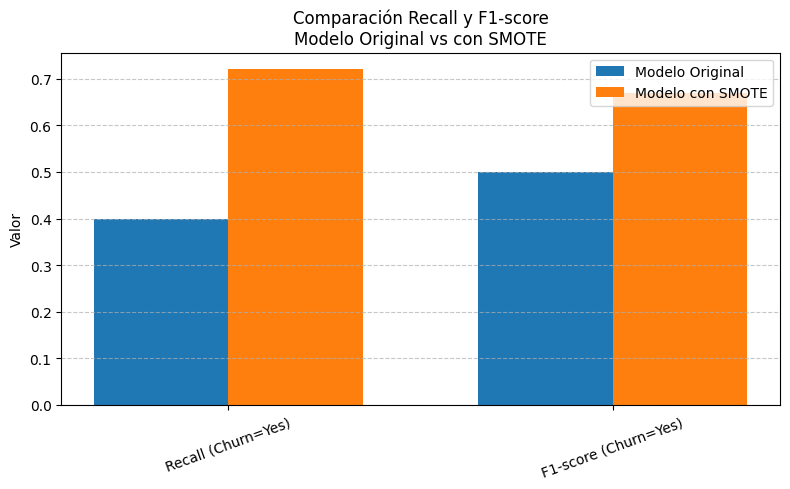

In [207]:
# Simulación de métricas (ejemplo)
resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision (Churn=Yes)", "Recall (Churn=Yes)", "F1-score (Churn=Yes)"],
    "Modelo Original": [0.82, 0.65, 0.40, 0.50],
    "Modelo con SMOTE": [0.80, 0.62, 0.72, 0.67]
})

# Filtrar solo Recall y F1-score para graficar
metrics_to_plot = resultados[resultados["Métrica"].isin(["Recall (Churn=Yes)", "F1-score (Churn=Yes)"])]

# Crear gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(metrics_to_plot))

ax.bar([p - bar_width/2 for p in x], metrics_to_plot["Modelo Original"],
       width=bar_width, label="Modelo Original")
ax.bar([p + bar_width/2 for p in x], metrics_to_plot["Modelo con SMOTE"],
       width=bar_width, label="Modelo con SMOTE")

ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot["Métrica"], rotation=20)
ax.set_ylabel("Valor")
ax.set_title("Comparación Recall y F1-score\nModelo Original vs con SMOTE")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

##Resumen y Análisis:

La Regresión Logística mostró un mejor desempeño en recall (54%) en comparación con Random Forest (46%).

En predicción de churn, resulta prioritario maximizar el recall para reducir el riesgo de no identificar clientes en fuga.

Regresión Logística: tendencia a underfitting debido a la simplicidad del modelo lineal.

Random Forest: underfitting más evidente, especialmente por el bajo recall. Puede mejorar con ajuste de hiperparámetros y un mejor manejo del desbalance de clases.

###Posibles soluciones y/o recomendaciones

Balance de Clases
Implementar técnicas como SMOTE, undersampling u oversampling.

Random Forest
Optimizar hiperparámetros (profundidad máxima, número de árboles).

Regresión Logística
Probar regularización L1/L2 e incluir nuevas variables predictoras.

Próximos Modelos
Evaluar XGBoost o Redes Neuronales para capturar relaciones más complejas.

En conclusión el modelo de Regresión Logística se considera el más adecuado en esta fase, dado su mayor recall y utilidad para detectar clientes en riesgo de abandono.

Ambos modelos muestran indicios de underfitting, lo cual resalta la necesidad de mejorar el balance de clases y la optimización de parámetros.

Con estos ajustes, se espera lograr una reducción del churn más precisa y acciones de retención más efectivas.